In [2]:
from sklearn.datasets import fetch_california_housing
california_housing  = fetch_california_housing(as_frame=True)
#print(california_housing)

# Example of regression

In [3]:
from sklearn.model_selection import train_test_split
df = california_housing.frame 
feature_list = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude', 'Latitude']
target = 'MedHouseVal' 
y = df[target]
X = df[feature_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
df.head()
len(df)

20640

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
tr = DecisionTreeRegressor(max_depth=15, min_samples_leaf = 15, random_state=1)
model_tree = tr.fit(X_train, y_train)
prediction=model_tree.predict(X_test)
print('R2 Value tree:',metrics.r2_score(y_test, prediction))

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.000001)
model_lasso = lasso.fit(X_train,y_train)
print('R2 Value lasso:',metrics.r2_score(y_test, model_lasso.predict(X_test)))

R2 Value tree: 0.5895478603219645
R2 Value lasso: 0.5943227785327496


#### Visulaize the decision tree

In [20]:
from matplotlib import pyplot as plt
model_tree.get_depth()
text_representation = tree.export_text(model_tree)

'''
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_tree, 
                   feature_names= feature_list,  
                   class_names=target,
                   filled=True)
'''

'\nprint(text_representation)\nfig = plt.figure(figsize=(25,20))\n_ = tree.plot_tree(model_tree, \n                   feature_names= feature_list,  \n                   class_names=target,\n                   filled=True)\n'

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, max_depth=15, min_samples_leaf = 15, random_state = 0)
model_rf = rf.fit(X_train, y_train)
prediction=model_rf.predict(X_test)
print('R2 Value:',metrics.r2_score(y_test, prediction))

R2 Value: 0.7703490454085704


# Example of classification

In [28]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

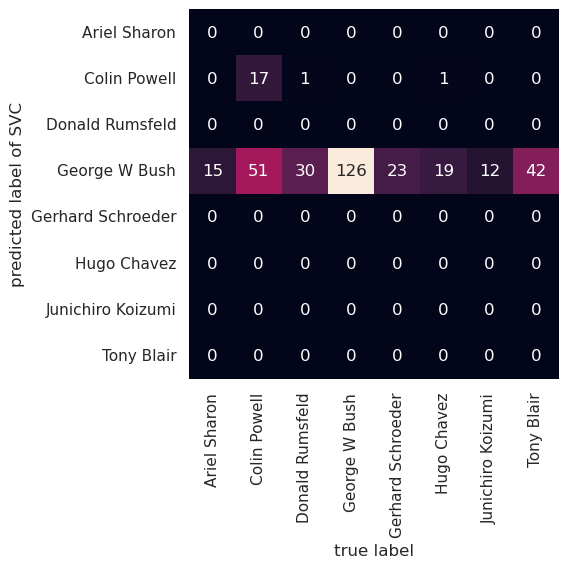

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced', gamma = 0.005)
dt = DecisionTreeClassifier(criterion='entropy',max_depth=40, min_samples_leaf = 15, random_state=2)
rfc = RandomForestClassifier(n_estimators = 200, criterion='entropy',max_depth=40, min_samples_leaf = 15)
pipe_line_svc = make_pipeline(pca, svc)
pipe_line_tree = make_pipeline(pca, dt)
pipe_line_rfc = make_pipeline(pca, rfc)
model_svc = pipe_line_svc.fit(Xtrain, ytrain)
model_tree = pipe_line_tree.fit(Xtrain, ytrain)
model_rfc = pipe_line_rfc.fit(Xtrain, ytrain)
yfit_svc = model_svc.predict(Xtest)
yfit_tree = model_tree.predict(Xtest)
yfit_rfc = model_rfc.predict(Xtest)
mat_svc = confusion_matrix(ytest, yfit_svc)
mat_tree = confusion_matrix(ytest, yfit_tree)
mat_rfc = confusion_matrix(ytest, yfit_rfc)

## Plotting confusion matrix
sns.heatmap(mat_rfc.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label of SVC');

